In [22]:
historyGlobal = None
def plot_history(history):
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  plt.figure()
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.legend()

  plt.show()

def train_model(model,epochs=25):
  history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=epochs,
      #validation_data=valid_generator,
      validation_steps=100, callbacks=[])
  global historyGlobal
  historyGlobal = history
  plot_history(history)

In [23]:
file_path = "/content/drive/MyDrive/SP2021/4390/Images_sorted"
file_train = "/content/drive/MyDrive/SP2021/4390/images_sorted2/Training"
file_test = "/content/drive/MyDrive/SP2021/4390/images_sorted2/Testing"

file_train = r"C:\Users\sntre\Documents\GitHub\SP2021\DL\images_sorted_x256"
#Local copies


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator = ImageDataGenerator(rescale=1./255)

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
    )

validate_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
    )
train_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory( file_train, target_size=(256, 256), batch_size=16, class_mode='binary')
#valid_generator = validate_datagen.flow_from_directory(file_test, target_size=(256, 256), batch_size=16, class_mode='binary')

Found 2669 images belonging to 2 classes.


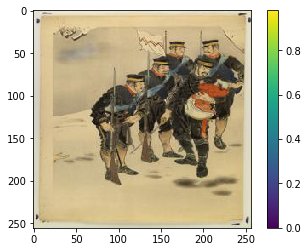

(256, 256, 3)
1.0


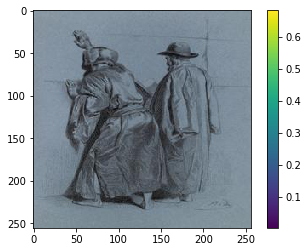

(256, 256, 3)
0.0


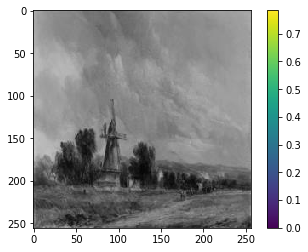

(256, 256, 3)
0.0


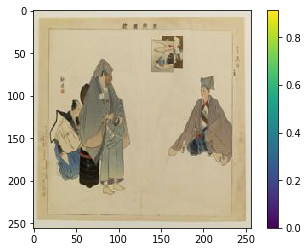

(256, 256, 3)
1.0


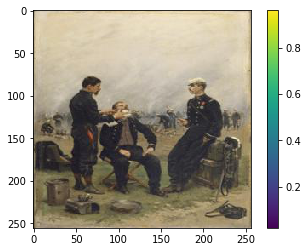

(256, 256, 3)
0.0


In [27]:
import matplotlib.pyplot as plt
import numpy as np
itor = 0
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        #plt.imshow(images[i])
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    if itor > 3: break
    itor+=1

Build a model:

In [28]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 252, 252, 8)       4616      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 250, 250, 8)       584       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 248, 248, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7688)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)               

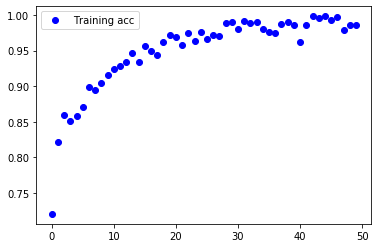

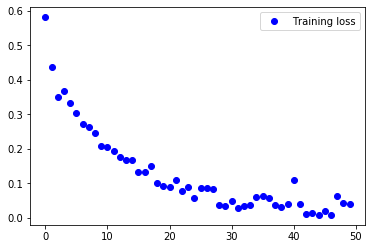

In [29]:

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (256, 256, 3)))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 8, strides = 8))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add( Dense( 1, activation = 'sigmoid' ) )
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())
train_model(model,epochs=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 252, 252, 8)       4616      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 250, 250, 8)       584       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 248, 248, 8)       584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 124, 8)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

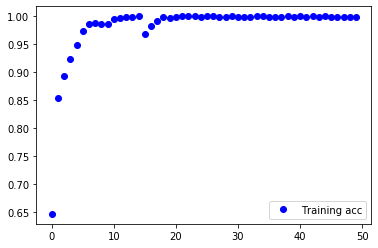

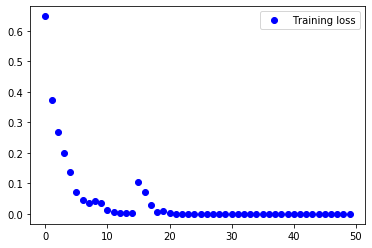

In [30]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (256, 256, 3)))
#model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add( Dense( 1, activation = 'sigmoid' ) )
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())
train_model(model,epochs=50)